In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '/data/mengxin/ping/CityLearn/citylearn/data/datasets/citylearn_challenge_2023_phase_1/Building_2.csv'
data = pd.read_csv(file_path)

# 查看数据的基本信息
print(data.info())

# 显示前几行数据
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      720 non-null    int64  
 1   hour                                       720 non-null    int64  
 2   day_type                                   720 non-null    int64  
 3   daylight_savings_status                    720 non-null    int64  
 4   indoor_dry_bulb_temperature                720 non-null    float64
 5   average_unmet_cooling_setpoint_difference  720 non-null    float64
 6   indoor_relative_humidity                   720 non-null    float64
 7   non_shiftable_load                         720 non-null    float64
 8   dhw_demand                                 720 non-null    float64
 9   cooling_demand                             720 non-null    float64
 10  heating_demand            

In [37]:
# 计算每列的统计信息（如均值、标准差等）
print(data[['non_shiftable_load','dhw_demand','cooling_demand','heating_demand']].describe())


       non_shiftable_load  dhw_demand  cooling_demand  heating_demand
count          720.000000  720.000000      720.000000           720.0
mean             0.448812    0.062562        1.744734             0.0
std              0.607980    0.218332        1.350848             0.0
min              0.168683    0.000000        0.000000             0.0
25%              0.202237    0.000000        0.537145             0.0
50%              0.359115    0.000000        1.551315             0.0
75%              0.544013    0.000000        2.728921             0.0
max              8.825168    3.311841        5.876511             0.0


In [38]:
print(data.heating_demand)
print(data['heating_demand'].unique())

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: heating_demand, Length: 720, dtype: float64
[0.]


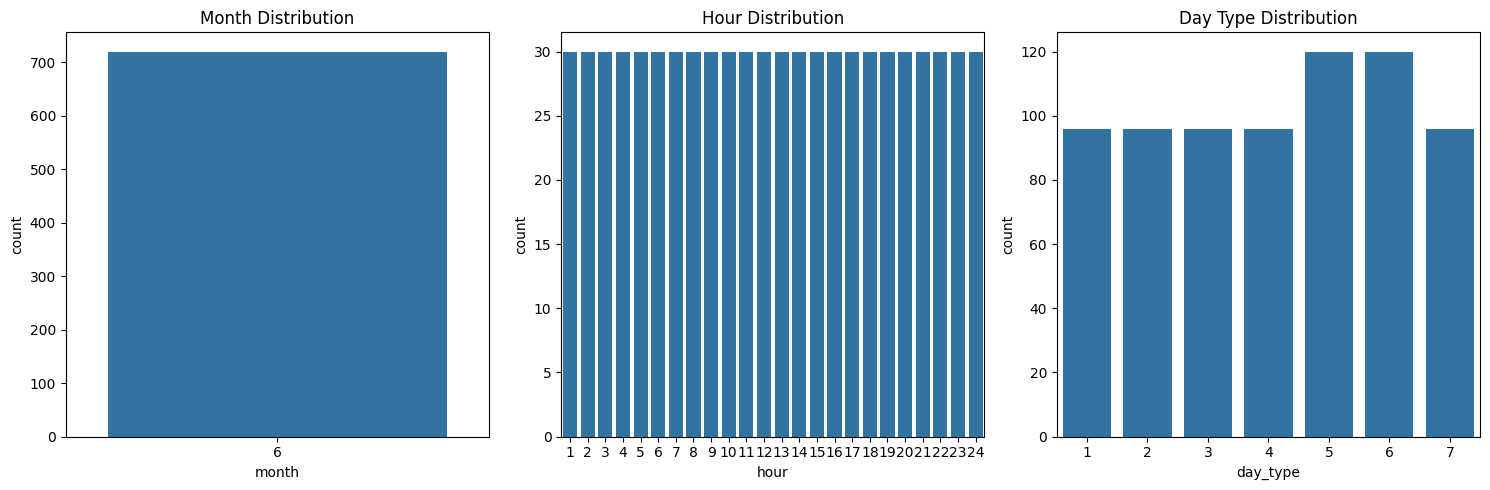

In [39]:
# 分布图 - Month, Hour, Day Type
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='month', data=data)
plt.title('Month Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='hour', data=data)
plt.title('Hour Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='day_type', data=data)
plt.title('Day Type Distribution')

plt.tight_layout()
plt.show()


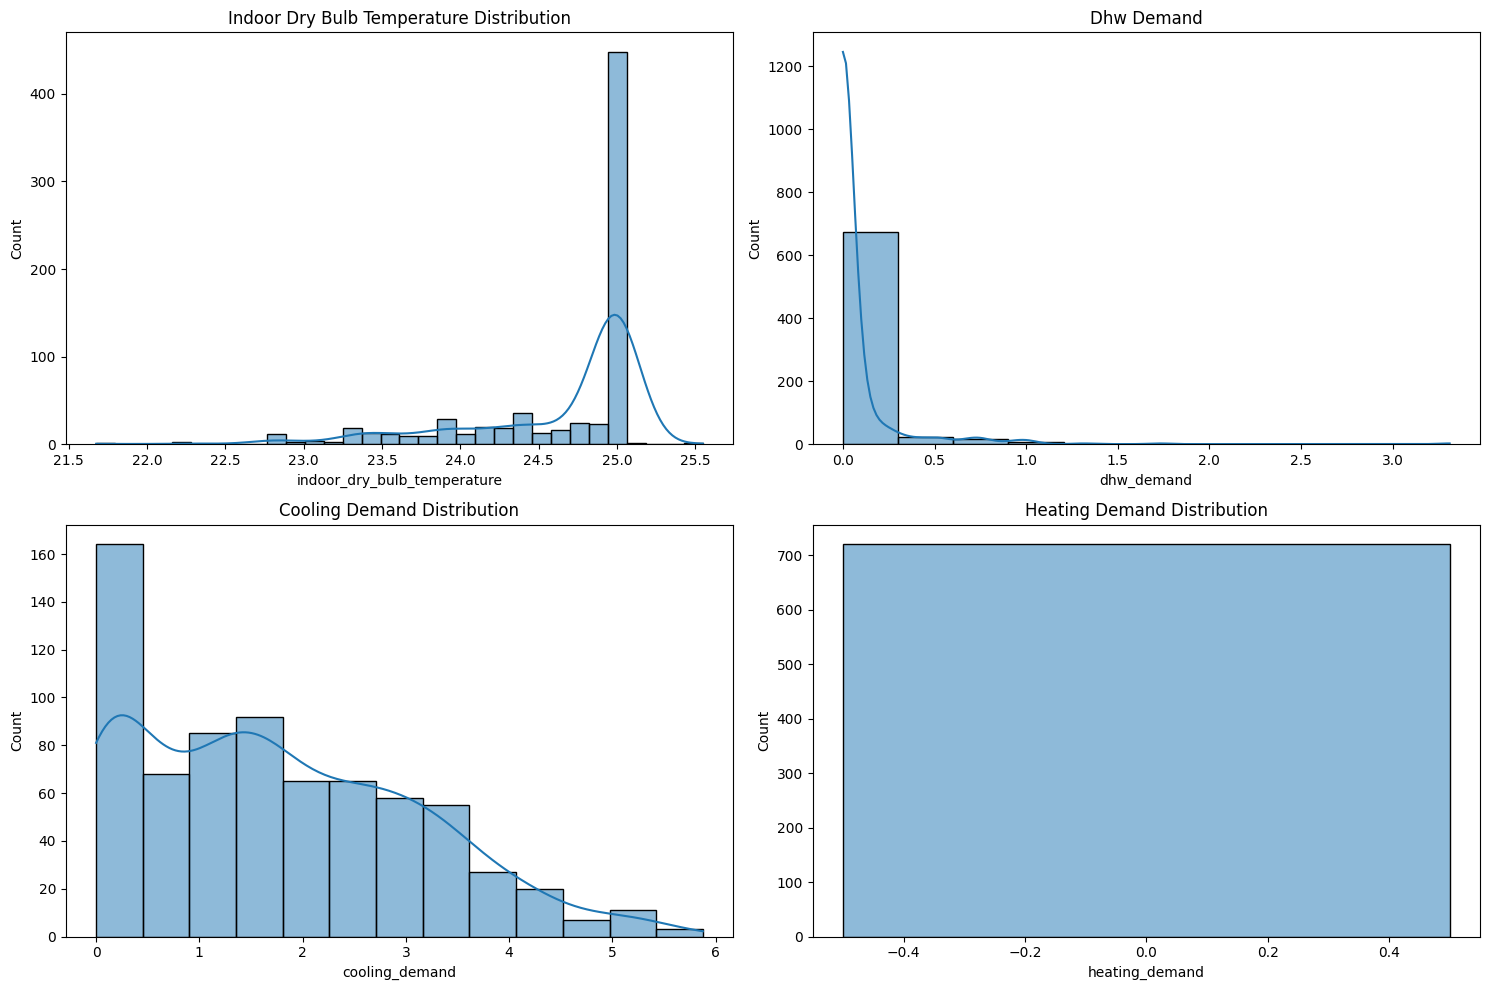

In [40]:
# 直方图 - 室内温度、湿度、冷却需求、加热需求
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['indoor_dry_bulb_temperature'], kde=True)
plt.title('Indoor Dry Bulb Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['dhw_demand'], kde=True)
plt.title('Dhw Demand')

plt.subplot(2, 2, 3)
sns.histplot(data['cooling_demand'], kde=True)
plt.title('Cooling Demand Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['heating_demand'], kde=True)
plt.title('Heating Demand Distribution')

plt.tight_layout()
plt.show()


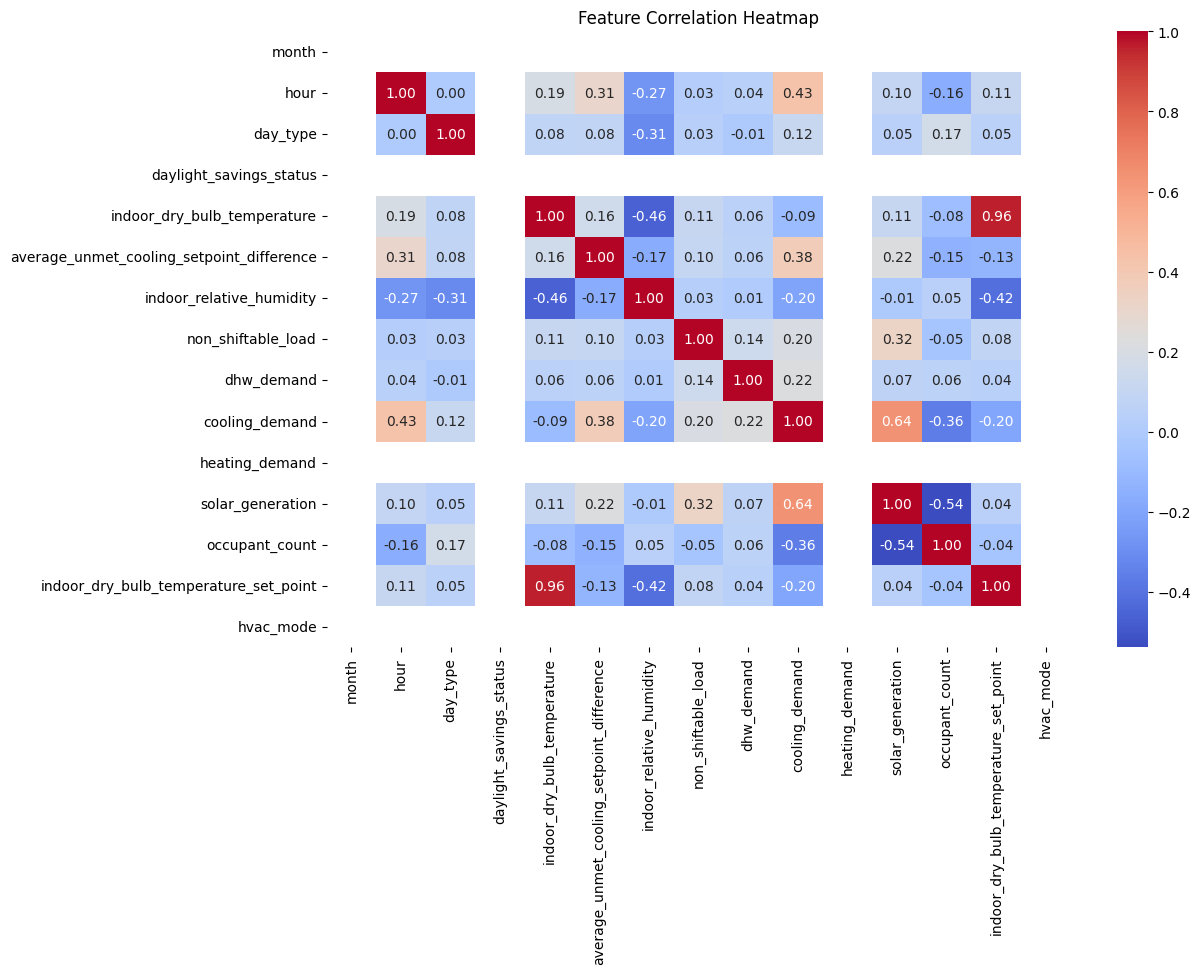

In [41]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 相关性矩阵的热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [42]:
consumption_related_features = ['non_shiftable_load','dhw_demand','cooling_demand','heating_demand']
high_related_features_dict = {'non_shiftable_load':['cooling_demand','solar_generation','hour','indoor_dry_bulb_temperature','indoor_relative_humidity','indoor_dry_bulb_temperature_set_point'],
                              'dhw_demand':['cooling_demand','hour'],
                              'cooling_demand':['average_unmet_cooling_setpoint_difference','hour','non_shiftable_loan','indoor_dry_bulb_temperature','solar_generation'],
                              'heating_demand':[]}

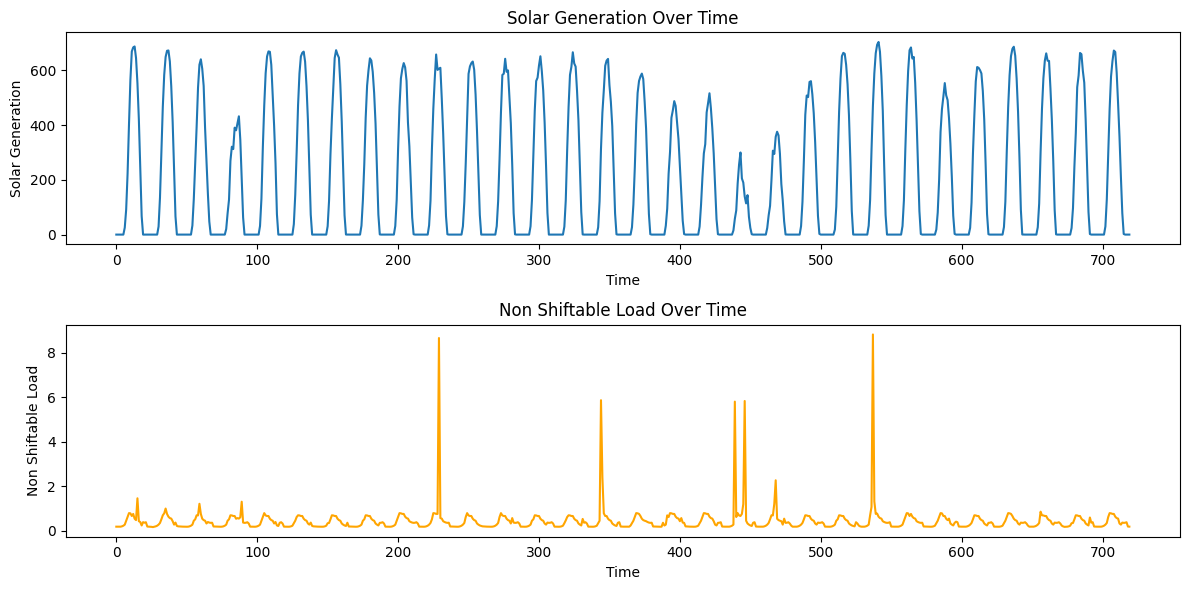

In [43]:
# 时间序列 - Solar Generation 和 Non Shiftable Load
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data['solar_generation'])
plt.title('Solar Generation Over Time')
plt.xlabel('Time')
plt.ylabel('Solar Generation')

plt.subplot(2, 1, 2)
plt.plot(data['non_shiftable_load'], color='orange')
plt.title('Non Shiftable Load Over Time')
plt.xlabel('Time')
plt.ylabel('Non Shiftable Load')

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   electricity_pricing                720 non-null    float64
 1   electricity_pricing_predicted_6h   720 non-null    float64
 2   electricity_pricing_predicted_12h  720 non-null    float64
 3   electricity_pricing_predicted_24h  720 non-null    float64
dtypes: float64(4)
memory usage: 22.6 KB
None
   electricity_pricing  electricity_pricing_predicted_6h  \
0              0.02893                           0.02893   
1              0.02893                           0.02915   
2              0.02893                           0.02915   
3              0.02893                           0.02915   
4              0.02893                           0.02915   

   electricity_pricing_predicted_12h  electricity_pricing_predicted_24h  
0                            0.

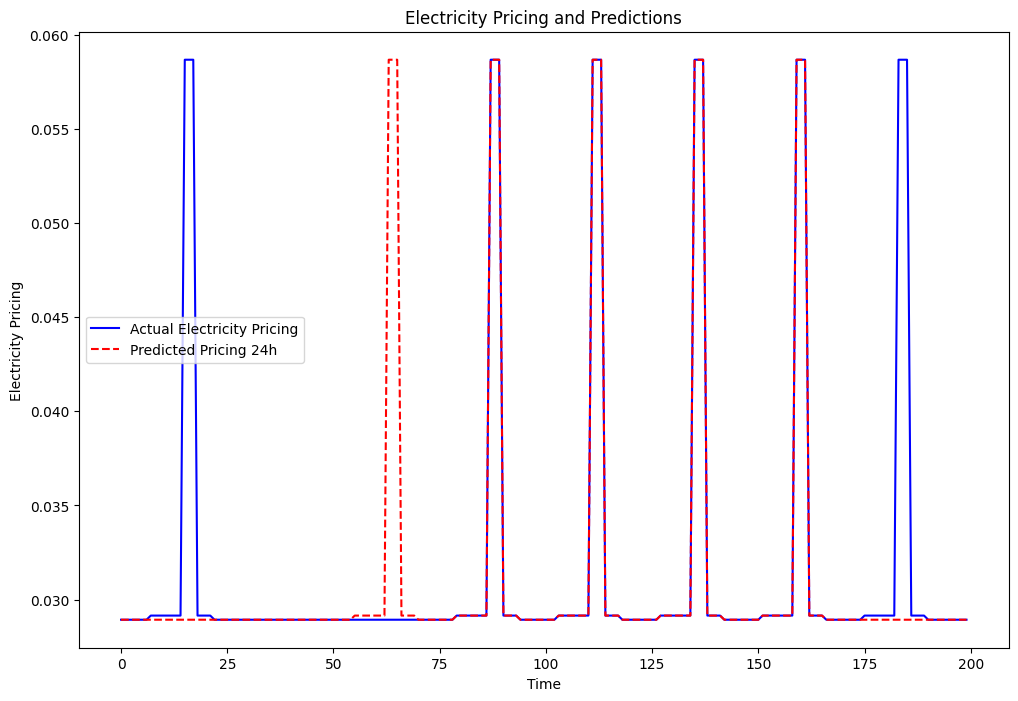

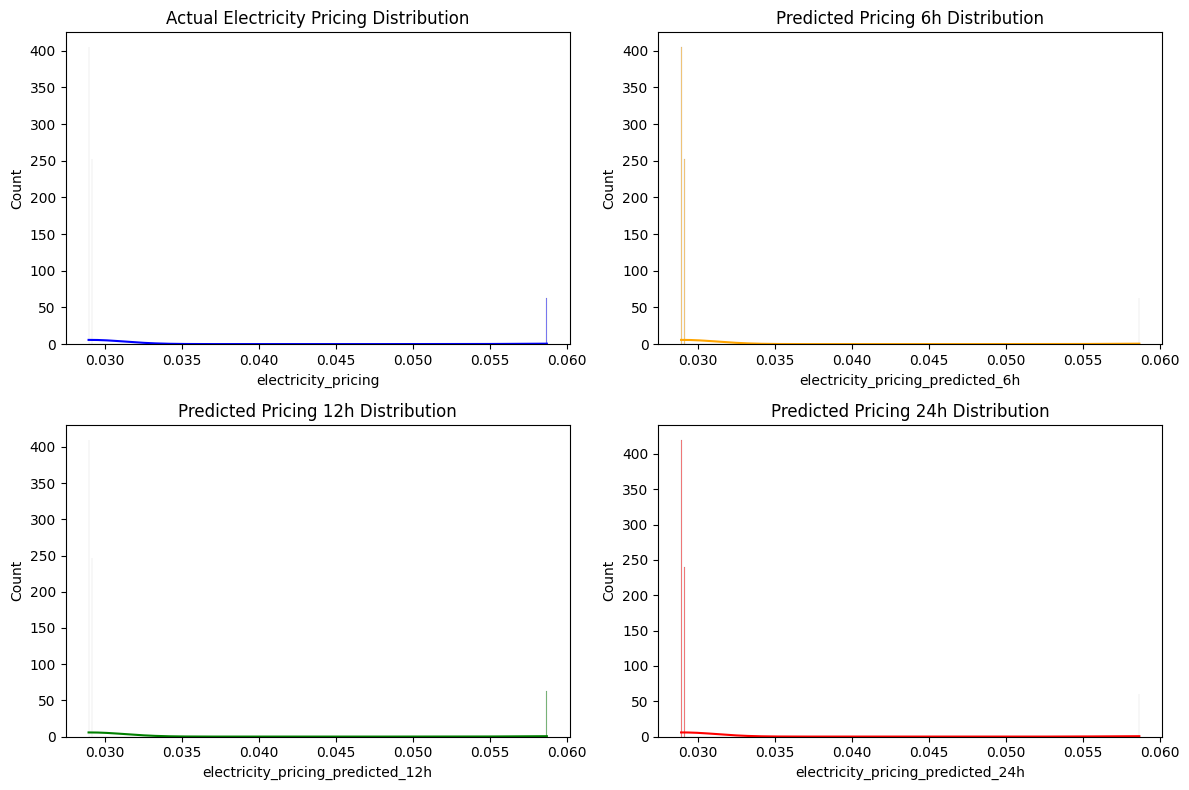

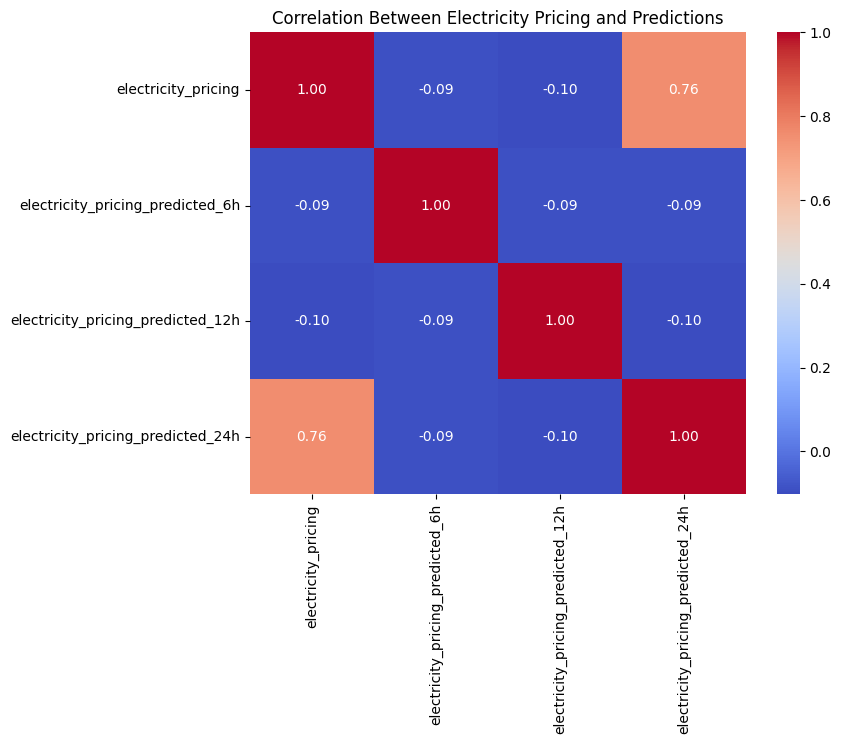

In [44]:
# 加载电价数据
price_file_path = '/data/mengxin/ping/CityLearn/citylearn/data/datasets/citylearn_challenge_2023_phase_1/pricing.csv'
price_data = pd.read_csv(price_file_path)

# 查看数据的基本信息
print(price_data.info())

# 显示前几行数据
print(price_data.head())

# 统计各特征的基本统计信息
print(price_data.describe())

# 绘制电价和预测电价的时间序列
plt.figure(figsize=(12, 8))

plt.plot(price_data['electricity_pricing'][:200], label='Actual Electricity Pricing', color='blue')
# plt.plot(price_data['electricity_pricing_predicted_6h'][:200], label='Predicted Pricing 6h', linestyle='--', color='orange')
# plt.plot(price_data['electricity_pricing_predicted_12h'][:200], label='Predicted Pricing 12h', linestyle='--', color='green')
plt.plot(price_data['electricity_pricing_predicted_24h'][:200], label='Predicted Pricing 24h', linestyle='--', color='red')

plt.title('Electricity Pricing and Predictions')
plt.xlabel('Time')
plt.ylabel('Electricity Pricing')
plt.legend()
plt.show()

# 绘制电价及预测值的分布图
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(price_data['electricity_pricing'], kde=True, color='blue')
plt.title('Actual Electricity Pricing Distribution')

plt.subplot(2, 2, 2)
sns.histplot(price_data['electricity_pricing_predicted_6h'], kde=True, color='orange')
plt.title('Predicted Pricing 6h Distribution')

plt.subplot(2, 2, 3)
sns.histplot(price_data['electricity_pricing_predicted_12h'], kde=True, color='green')
plt.title('Predicted Pricing 12h Distribution')

plt.subplot(2, 2, 4)
sns.histplot(price_data['electricity_pricing_predicted_24h'], kde=True, color='red')
plt.title('Predicted Pricing 24h Distribution')

plt.tight_layout()
plt.show()

# 计算电价和预测之间的相关性
correlation_matrix = price_data.corr()

# 绘制相关性矩阵的热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Electricity Pricing and Predictions')
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载天气数据
weather_file_path = '/data/mengxin/ping/CityLearn/citylearn/data/datasets/citylearn_challenge_2023_phase_1/weather.csv'
weather_data = pd.read_csv(weather_file_path)

# 查看数据的基本信息
print(weather_data.info())

# 显示前几行数据
print(weather_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   outdoor_dry_bulb_temperature                720 non-null    float64
 1   outdoor_relative_humidity                   720 non-null    float64
 2   diffuse_solar_irradiance                    720 non-null    float64
 3   direct_solar_irradiance                     720 non-null    float64
 4   outdoor_dry_bulb_temperature_predicted_6h   720 non-null    float64
 5   outdoor_dry_bulb_temperature_predicted_12h  720 non-null    float64
 6   outdoor_dry_bulb_temperature_predicted_24h  720 non-null    float64
 7   outdoor_relative_humidity_predicted_6h      720 non-null    float64
 8   outdoor_relative_humidity_predicted_12h     720 non-null    float64
 9   outdoor_relative_humidity_predicted_24h     720 non-null    float64
 10  diffuse_solar_

In [46]:
# 统计各特征的基本统计信息
print(weather_data.describe())


       outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
count                    720.000000                 720.000000   
mean                      29.588125                  63.663111   
std                        4.787630                  22.398824   
min                       21.380000                  24.120000   
25%                       25.327500                  42.620000   
50%                       28.480000                  65.280000   
75%                       34.092500                  85.120000   
max                       40.320000                 100.000000   

       diffuse_solar_irradiance  direct_solar_irradiance  \
count                720.000000               720.000000   
mean                  91.487792               270.519361   
std                  108.546269               306.169735   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                   64.695000              

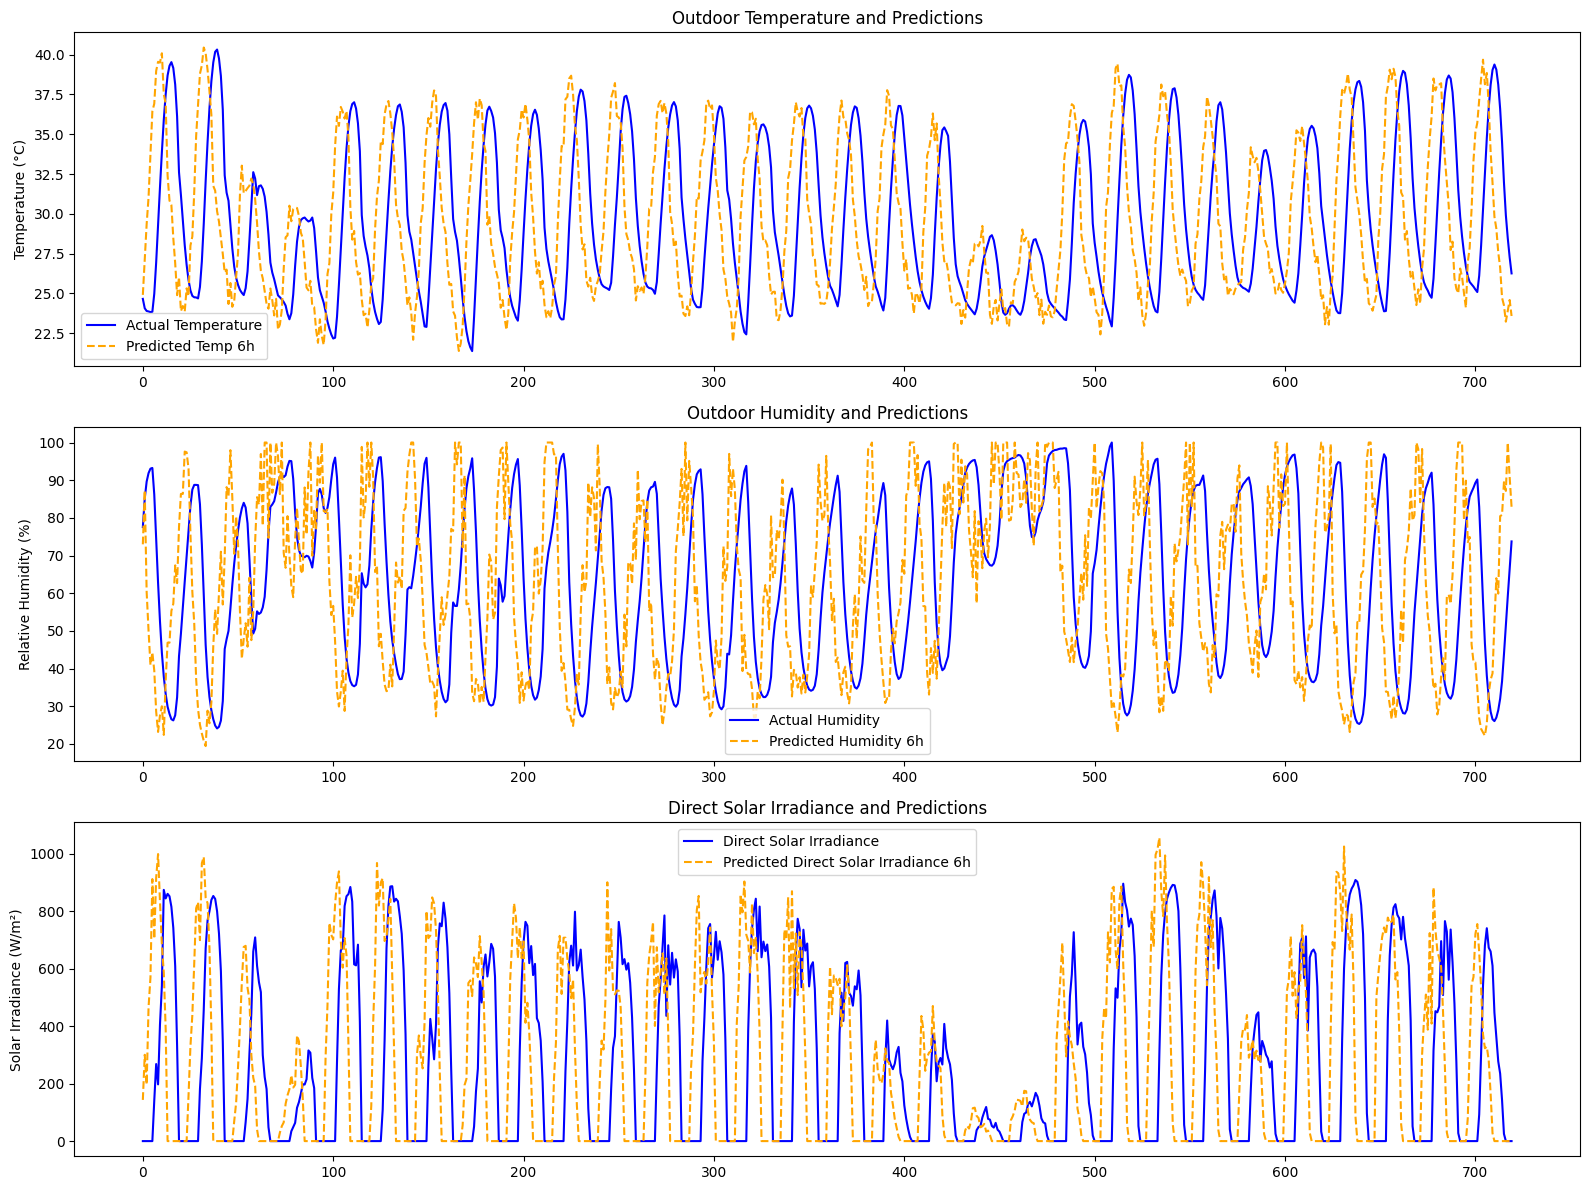

In [47]:
# 绘制室外温度、湿度和太阳辐照度的时间序列
plt.figure(figsize=(16, 12))

# 室外温度时间序列
plt.subplot(3, 1, 1)
plt.plot(weather_data['outdoor_dry_bulb_temperature'], label='Actual Temperature', color='blue')
plt.plot(weather_data['outdoor_dry_bulb_temperature_predicted_6h'], label='Predicted Temp 6h', linestyle='--', color='orange')
# plt.plot(weather_data['outdoor_dry_bulb_temperature_predicted_12h'], label='Predicted Temp 12h', linestyle='--', color='green')
# plt.plot(weather_data['outdoor_dry_bulb_temperature_predicted_24h'], label='Predicted Temp 24h', linestyle='--', color='red')
plt.title('Outdoor Temperature and Predictions')
plt.ylabel('Temperature (°C)')
plt.legend()

# 室外湿度时间序列
plt.subplot(3, 1, 2)
plt.plot(weather_data['outdoor_relative_humidity'], label='Actual Humidity', color='blue')
plt.plot(weather_data['outdoor_relative_humidity_predicted_6h'], label='Predicted Humidity 6h', linestyle='--', color='orange')
# plt.plot(weather_data['outdoor_relative_humidity_predicted_12h'], label='Predicted Humidity 12h', linestyle='--', color='green')
# plt.plot(weather_data['outdoor_relative_humidity_predicted_24h'], label='Predicted Humidity 24h', linestyle='--', color='red')
plt.title('Outdoor Humidity and Predictions')
plt.ylabel('Relative Humidity (%)')
plt.legend()

# 太阳辐照度时间序列
plt.subplot(3, 1, 3)
plt.plot(weather_data['direct_solar_irradiance'], label='Direct Solar Irradiance', color='blue')
plt.plot(weather_data['direct_solar_irradiance_predicted_6h'], label='Predicted Direct Solar Irradiance 6h', linestyle='--', color='orange')
# plt.plot(weather_data['direct_solar_irradiance_predicted_12h'], label='Predicted Direct Solar Irradiance 12h', linestyle='--', color='green')
# plt.plot(weather_data['direct_solar_irradiance_predicted_24h'], label='Predicted Direct Solar Irradiance 24h', linestyle='--', color='red')
plt.title('Direct Solar Irradiance and Predictions')
plt.ylabel('Solar Irradiance (W/m²)')
plt.legend()

plt.tight_layout()
plt.show()


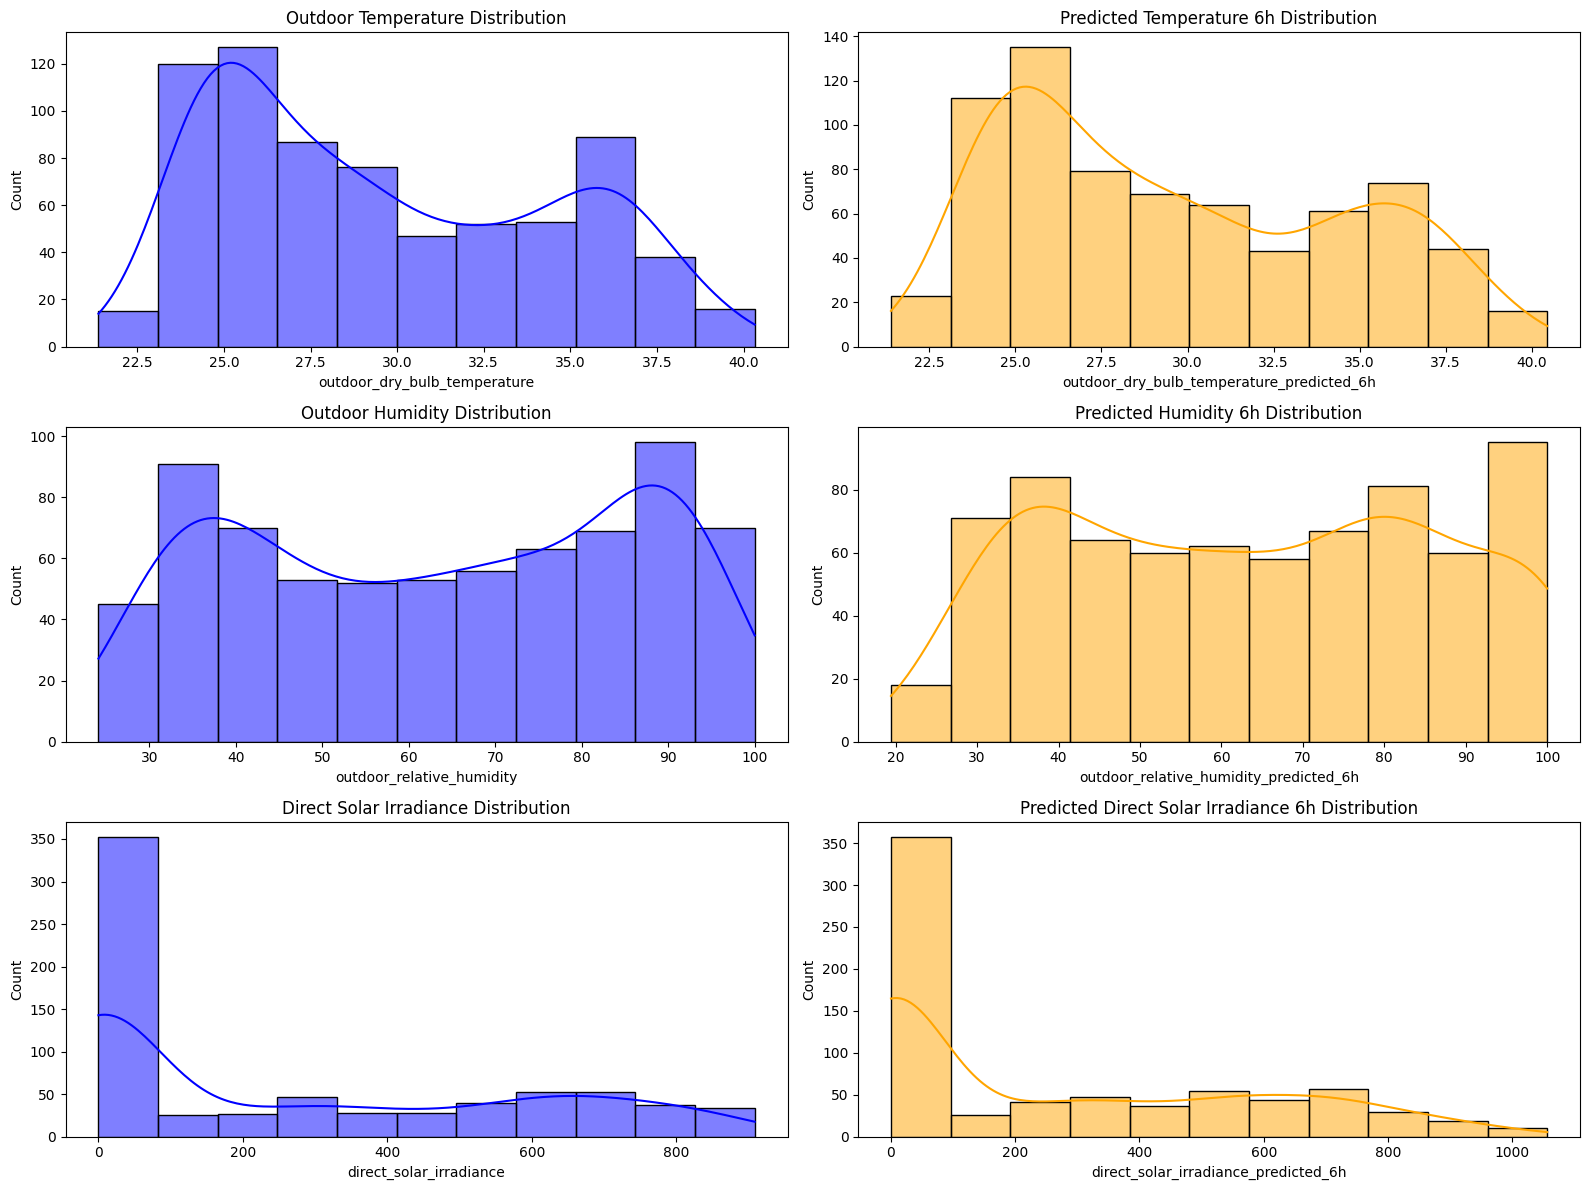

In [48]:
# 室外温度、湿度和太阳辐照度的分布
plt.figure(figsize=(16, 12))

# 室外温度分布
plt.subplot(3, 2, 1)
sns.histplot(weather_data['outdoor_dry_bulb_temperature'], kde=True, color='blue')
plt.title('Outdoor Temperature Distribution')

plt.subplot(3, 2, 2)
sns.histplot(weather_data['outdoor_dry_bulb_temperature_predicted_6h'], kde=True, color='orange')
plt.title('Predicted Temperature 6h Distribution')

# 室外湿度分布
plt.subplot(3, 2, 3)
sns.histplot(weather_data['outdoor_relative_humidity'], kde=True, color='blue')
plt.title('Outdoor Humidity Distribution')

plt.subplot(3, 2, 4)
sns.histplot(weather_data['outdoor_relative_humidity_predicted_6h'], kde=True, color='orange')
plt.title('Predicted Humidity 6h Distribution')

# 太阳辐照度分布
plt.subplot(3, 2, 5)
sns.histplot(weather_data['direct_solar_irradiance'], kde=True, color='blue')
plt.title('Direct Solar Irradiance Distribution')

plt.subplot(3, 2, 6)
sns.histplot(weather_data['direct_solar_irradiance_predicted_6h'], kde=True, color='orange')
plt.title('Predicted Direct Solar Irradiance 6h Distribution')

plt.tight_layout()
plt.show()


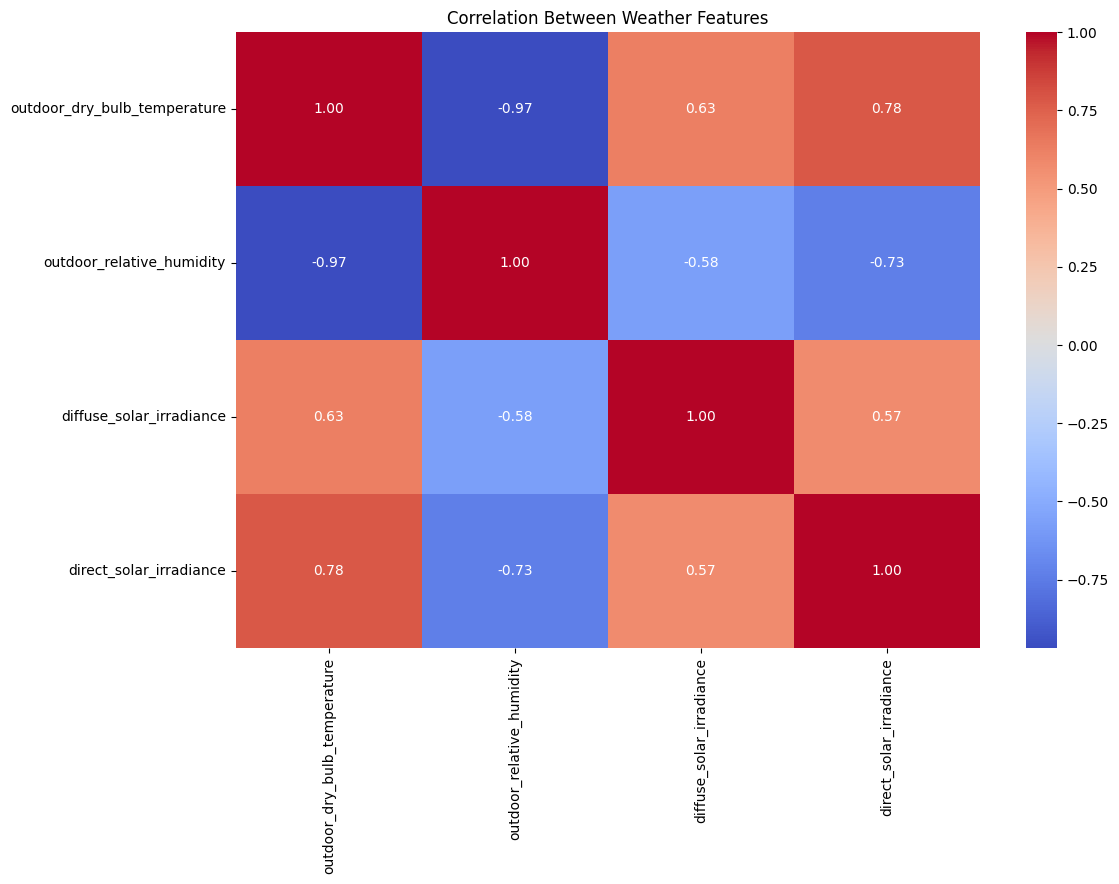

In [49]:
# 计算相关性矩阵
correlation_matrix = weather_data[['outdoor_dry_bulb_temperature','outdoor_relative_humidity','diffuse_solar_irradiance','direct_solar_irradiance']].corr()

# 相关性矩阵的热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Weather Features')
plt.show()


-consumption & features correlations

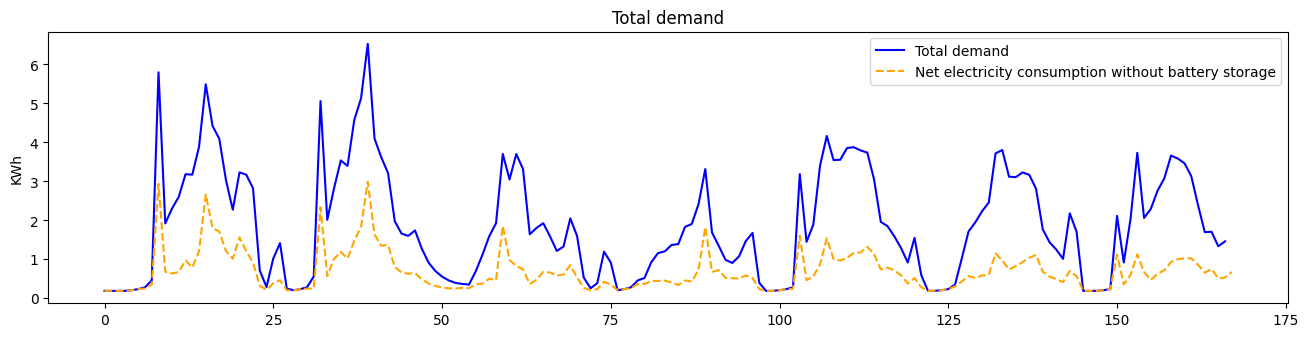

In [51]:
import numpy as np
total_demand = data[['non_shiftable_load','dhw_demand','cooling_demand','heating_demand']].sum(axis=1)
file_path_net_electricity_consumption_building_2 = '/data/mengxin/ping/CityLearn/results/2023/finetuned_SAC_more_observation_lr6e4/net_electricity_consumption_0_167.npy'
net_electricity_consumption = np.load(file_path_net_electricity_consumption_building_2)
plt.figure(figsize=(16, 12))


plt.subplot(3, 1, 1)
plt.plot(total_demand[:167], label='Total demand', color='blue')
########这里是两个building的net consumption
plt.plot(net_electricity_consumption, label='Net electricity consumption without battery storage', linestyle='--', color='orange')

plt.title('Total demand')
plt.ylabel('KWh')
plt.legend()

####每个楼的correlations 可能都不一样，building2 的solar generation会强一点。

                                           total_demand  \
total_demand                                   1.000000   
outdoor_dry_bulb_temperature                   0.790755   
outdoor_relative_humidity                     -0.777269   
diffuse_solar_irradiance                       0.522226   
direct_solar_irradiance                        0.647679   
month                                               NaN   
hour                                           0.367825   
day_type                                       0.105210   
daylight_savings_status                             NaN   
indoor_dry_bulb_temperature                   -0.028267   
average_unmet_cooling_setpoint_difference      0.351440   
indoor_relative_humidity                      -0.155494   
non_shiftable_load                             0.551343   
dhw_demand                                     0.364719   
cooling_demand                                 0.919276   
heating_demand                                      NaN 

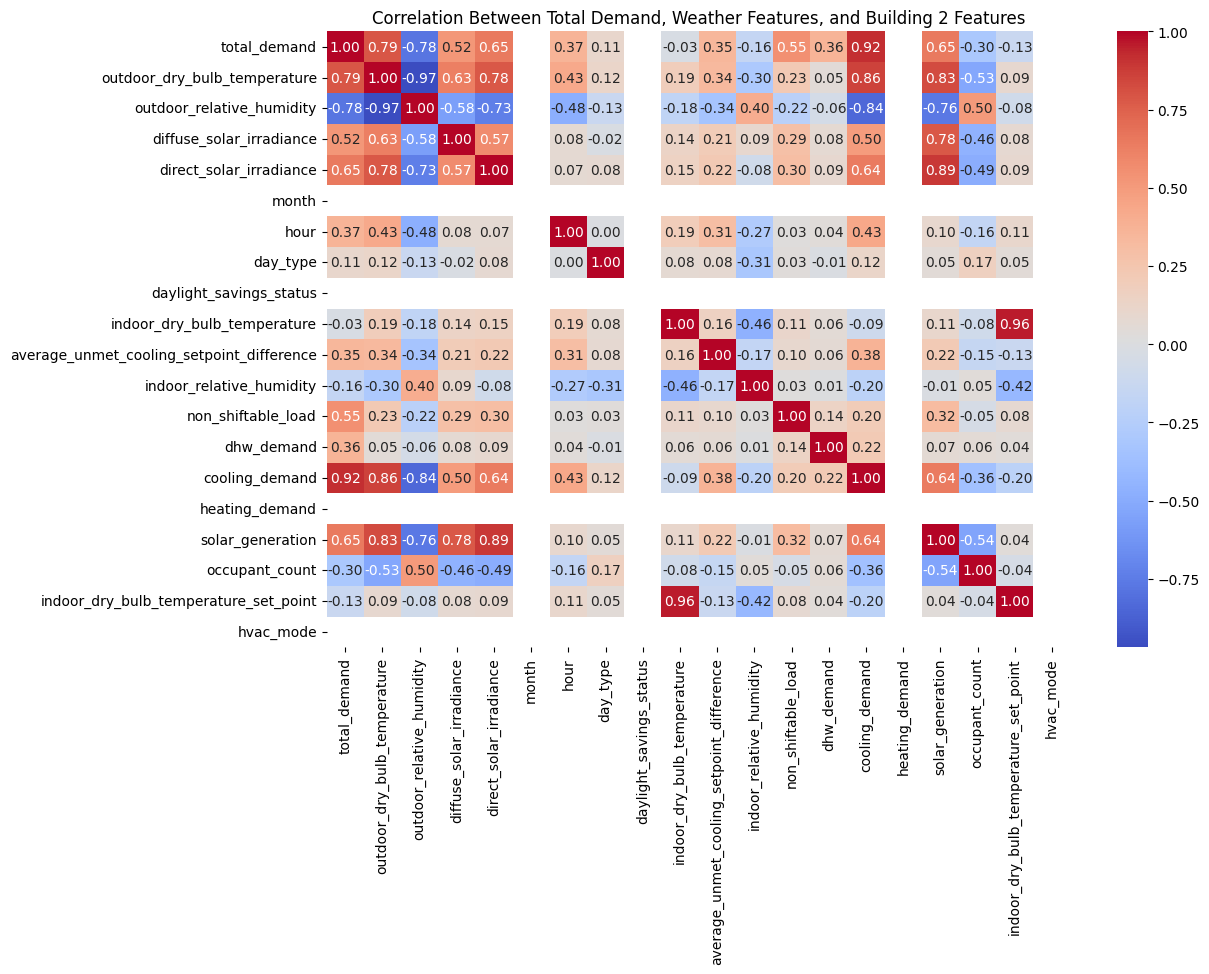

In [52]:
data['total_demand'] = data[['non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand']].sum(axis=1)
# 加载天气数据
weather_data = pd.read_csv('/data/mengxin/ping/CityLearn/citylearn/data/datasets/citylearn_challenge_2023_phase_1/weather.csv')

# 加载 Building_2 数据
building_2_data = pd.read_csv('/data/mengxin/ping/CityLearn/citylearn/data/datasets/citylearn_challenge_2023_phase_1/Building_2.csv')

# 合并所有数据，假设数据的时间轴一致，可以直接拼接
merged_data = pd.concat([data['total_demand'], 
                         weather_data[['outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 
                                       'diffuse_solar_irradiance', 'direct_solar_irradiance']],
                         building_2_data], axis=1)

# 计算相关性矩阵
correlation_matrix = merged_data.corr()

# 打印相关性矩阵
print(correlation_matrix)

# 绘制相关性矩阵的热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Total Demand, Weather Features, and Building 2 Features')
plt.show()